In [32]:
import pandas as pd
import numpy as np
import json

In [1]:
from PIL import Image
import os.path
from IPython.core.display import HTML, display


In [122]:
img_path = '../../code/data/iMaterialist/train_10kv2/'

In [61]:
labels = pd.read_csv('../../code/data/iMaterialist/train_10kv2_labels.csv')

labs = (
    labels
    .assign(label = lambda df: df.label.apply(lambda x: x.split(' ')))
    .set_index('id')['label']
    .apply(pd.Series)
    .stack()
    .reset_index()
    .drop('level_1', axis=1)
)
labs.columns = ['id', 'label']

In [69]:
labs.head()

,id,label
0,266445,136
1,266445,17
2,266445,222
3,266445,106
4,266445,53


In [86]:
counter = (
    labs
    .assign(counter=1)
    .groupby('label')
    ['counter']
    .sum()
    .reset_index()
    .sort_values('counter', ascending=False)
)
# # [66, 106, 163, 17]

# EDA on label 148

In [92]:
yes = labs.loc[labs['label'] == "148"]
no = labs.loc[labs['label'] != "148"]

In [154]:
all_imgs = !ls ../../code/data/iMaterialist/train_10kv2

In [265]:
arr_im.shape

(600, 600, 3)

In [273]:
arr_ims = [] #np.array()
pil_im = Image.open(img_path + all_imgs[100], 'r')
arr_im = np.asarray(pil_im)
arr_ims.append(arr_im)

pil_im = Image.open(img_path + all_imgs[101], 'r')
arr_im = np.asarray(pil_im)
arr_ims.append(arr_im)


In [291]:
np.append(arr_im, arr_im)

array([252, 252, 252, ..., 238, 238, 238], dtype=uint8)

In [288]:
ar = np.array([0]*2)

In [289]:
ar[0] = arr_im

ValueError: setting an array element with a sequence.

In [290]:
ar[0]

0

In [281]:
arr_im[0:1,].shape

(1, 271, 3)

In [268]:
arr_ims.shape

AttributeError: 'list' object has no attribute 'shape'

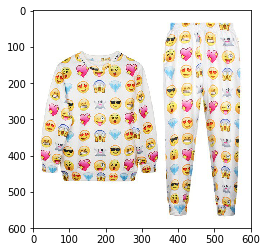

In [126]:
pil_im = Image.open(img_path + all_imgs[100], 'r')
arr_im = np.asarray(pil_im)
plt.imshow(arr_im)

In [233]:
all_imgs_train = [img.split('.')[0] for img in all_imgs]

In [261]:
def print_img(imgs):
    txt = """
        <table>
        """
    txt += "<tr>"
    print ('')
    for i, img in enumerate(imgs):
        path = img_path + str(img) + '.jpg'
        if i%9 == 0:
            txt += "</tr>" 
        if (os.path.exists(path)):
            txt += '''<td style="width: 100px!important; text-align: center;><a href="{im}" 
            target="_blank"><img src="{im}" /></a></td>'''.format(im = path)
        if (i+1)%9 == 0:
            txt += "</tr>" 
        
    txt += "</tr>"
    txt += """
        </table>
        """
    return txt


In [287]:
HTML(print_img(yes.sample(18)['id'].unique()))

,,,,,,,,,,,,,,,,,


In [263]:
HTML(print_img(no.sample(18)['id'].unique()))

,,,,,,,,,,,,,,,,,
